In [15]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

#Read in Data
df = pd.read_csv("/Users/myronmoskalyk/Library/CloudStorage/OneDrive-UniversityofToronto/Lectures/Applied Machine Learning/LungDS.csv")
df.head()


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [16]:
"""
Step 1: Exploration of Data

Includes for each RQ:
Correlation Table
Heatmap
Pairplots

"""

' \nStep 1: Exploration of Data\n\nIncludes for each RQ:\nCorrelation Table\nHeatmap\nPairplots\n\n'

Correlation Table for the original dataset: 
                        Age    Gender  Air Pollution  Alcohol Usage  \
Age                1.000000 -0.104146       0.041456       0.132828   
Gender            -0.104146  1.000000      -0.165097      -0.155158   
Air Pollution      0.041456 -0.165097       1.000000       0.512734   
Alcohol Usage      0.132828 -0.155158       0.512734       1.000000   
Genetic Risk       0.034801 -0.157086       0.427816       0.711012   
Lung Disease       0.080342 -0.141740       0.382661       0.594977   
Obesity            0.011607 -0.093119       0.379112       0.548102   
Smoking            0.052435 -0.170858       0.323364       0.487187   
Passive Smoker    -0.003206 -0.143020       0.412868       0.510851   
Chest Pain         0.013554 -0.166448       0.394851       0.603992   
Coughing of Blood  0.039650 -0.105924       0.365993       0.561570   
Severity           0.035742 -0.074792       0.382265       0.223088   

                   Genetic Risk

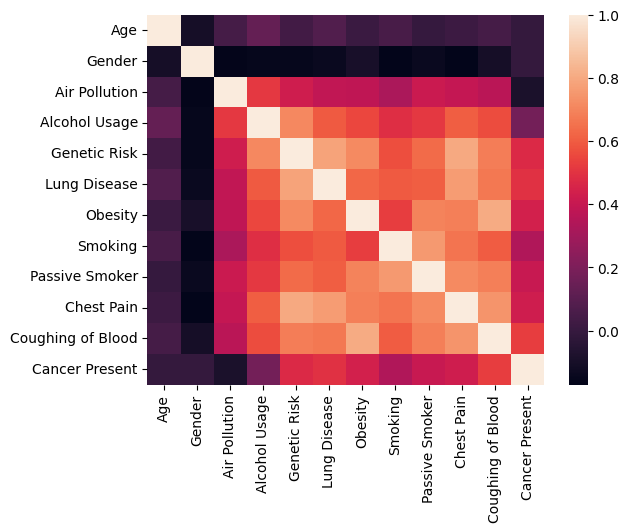

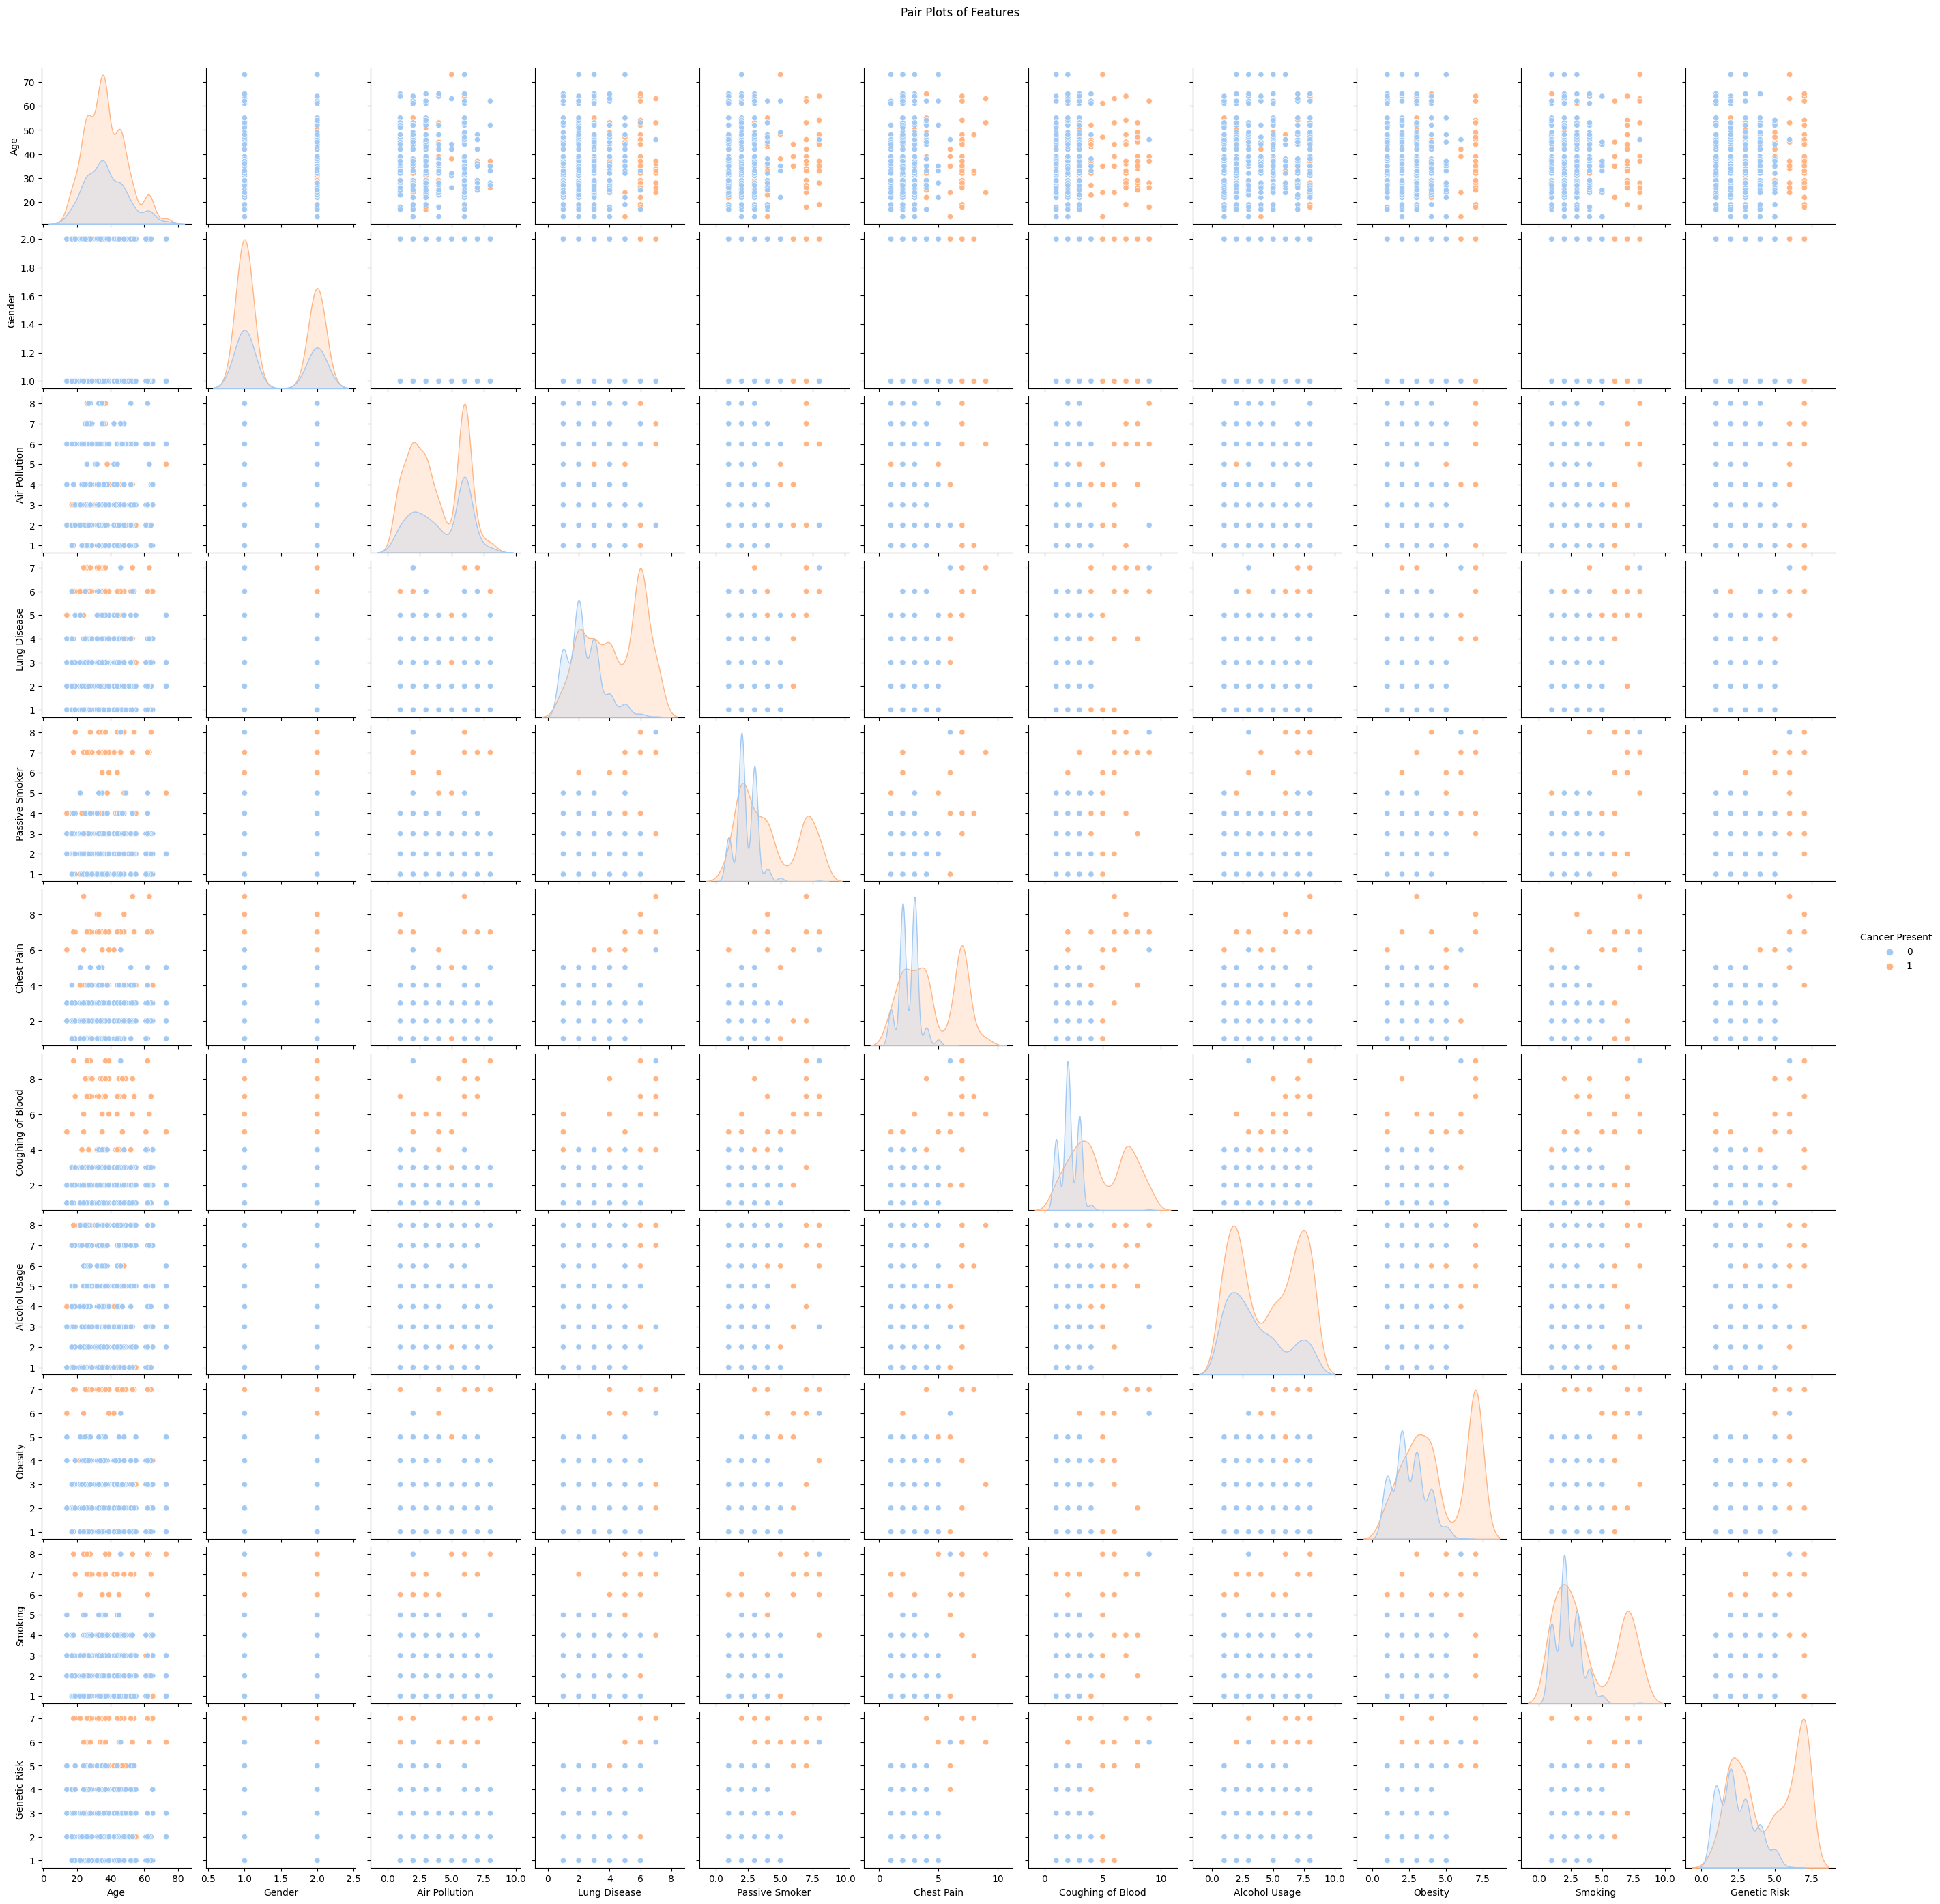



Correlation Table for the RQ2 dataset: 
                        Age    Gender  Air Pollution  Alcohol Usage  \
Age                1.000000 -0.202086       0.099494       0.151742   
Gender            -0.202086  1.000000      -0.246912      -0.227636   
Air Pollution      0.099494 -0.246912       1.000000       0.747293   
Alcohol Usage      0.151742 -0.227636       0.747293       1.000000   
Genetic Risk       0.073151 -0.222727       0.705276       0.877210   
Lung Disease       0.128952 -0.205061       0.626701       0.763576   
Obesity            0.034337 -0.123813       0.601468       0.669312   
Smoking            0.075333 -0.206924       0.481902       0.547035   
Passive Smoker     0.004908 -0.184826       0.606764       0.592576   
Chest Pain         0.012864 -0.218426       0.585734       0.717242   
Coughing of Blood  0.053006 -0.146505       0.607829       0.667612   
Severity           0.060048 -0.164985       0.636038       0.718710   

                   Genetic Risk  L

<function matplotlib.pyplot.show(close=None, block=None)>

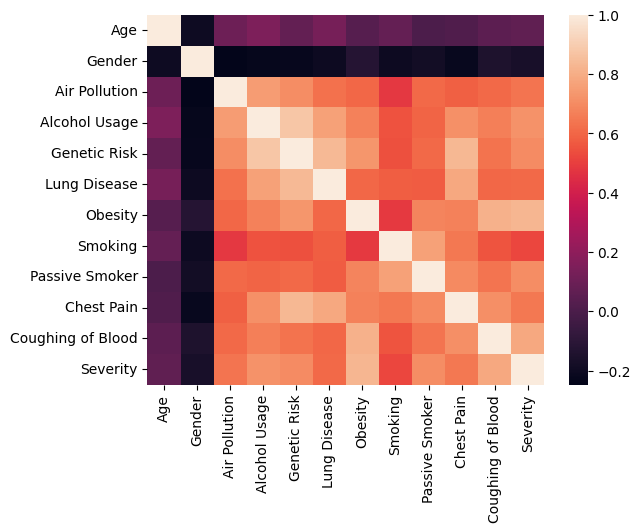

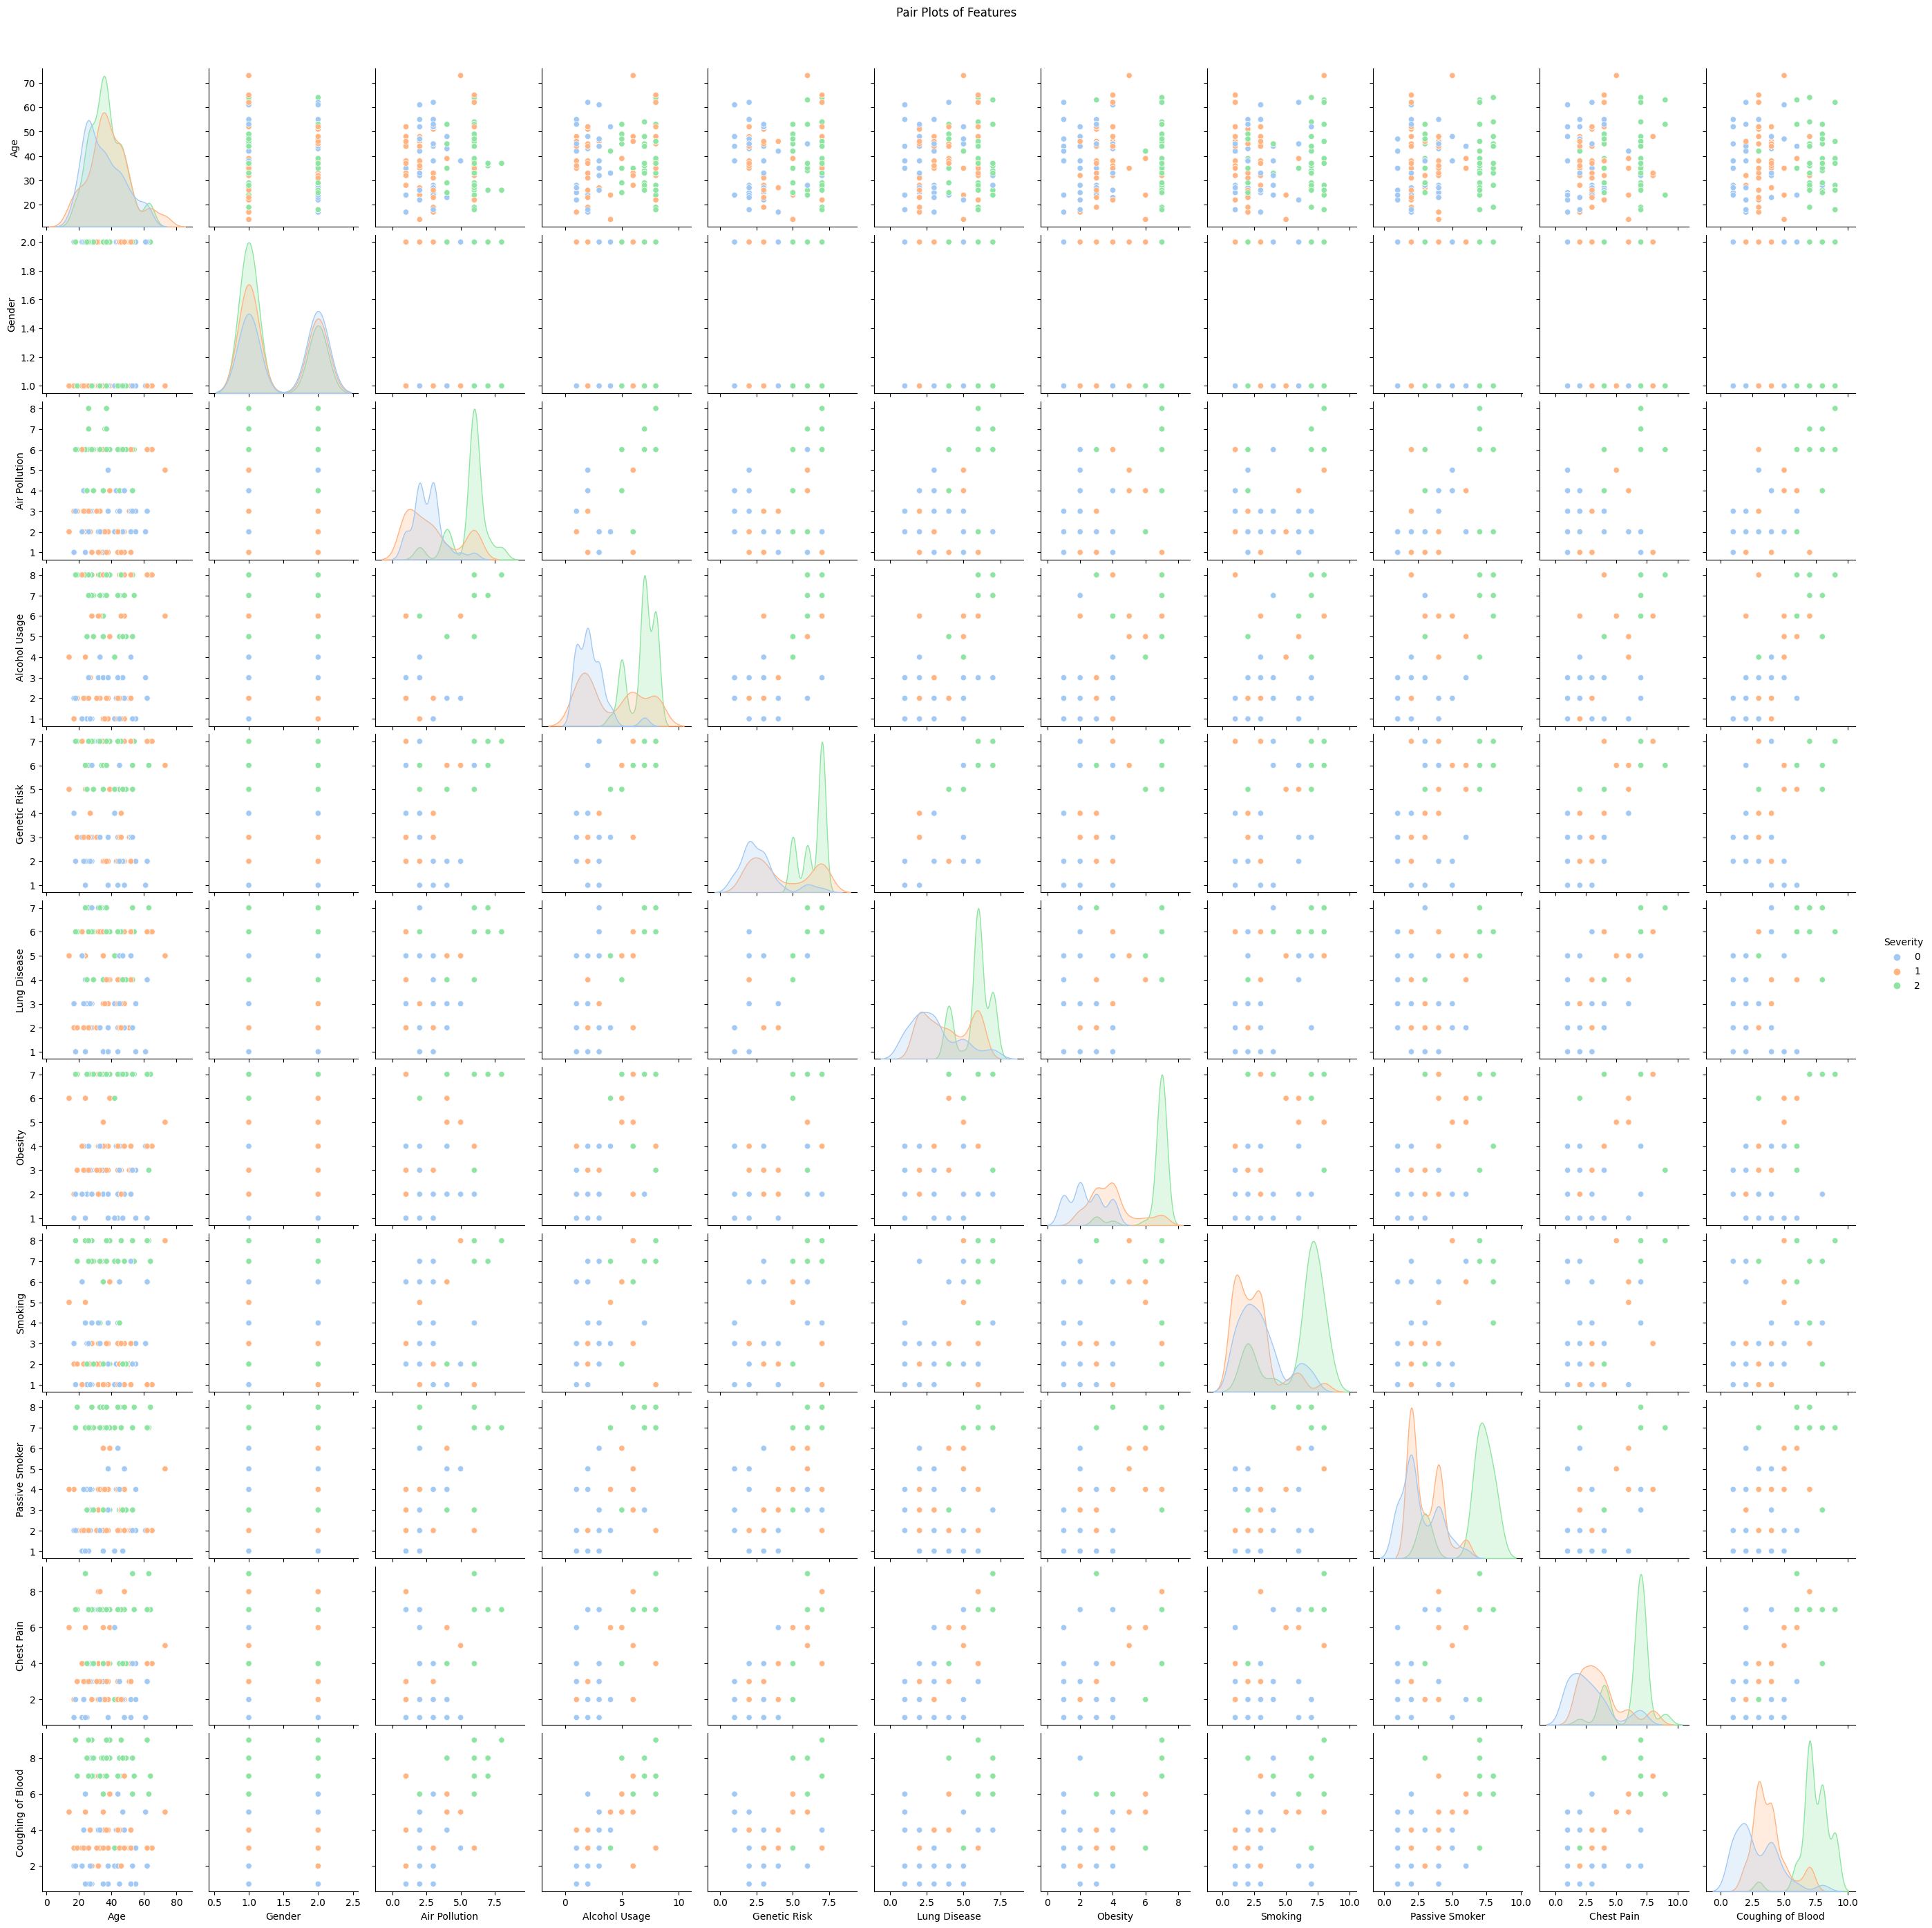

In [17]:
#General Correlation Table:
corr=df.corr()
round(corr,2)
print("Correlation Table for the original dataset: ")
print(corr)

#Research Question 1:
df_cancerpresent = df.copy()
df_cancerpresent.rename(columns={'Severity': 'Cancer Present'}, inplace=True)
df_cancerpresent.loc[df_cancerpresent['Cancer Present'].isin([0,1,2]), 'Cancer Present'] = 1 # 1 = Positive
df_cancerpresent.loc[df_cancerpresent['Cancer Present'] == 3, 'Cancer Present'] = 0 # 0 = Negative
#Correlation Table
corr1=df_cancerpresent.corr()
round(corr1,2)
print("\n\nCorrelation Table for the RQ1 dataset: ")
print(corr1)
#Heatmap
sns.heatmap(corr1)
#Pairplot
sns.pairplot(df_cancerpresent, hue='Cancer Present', vars=['Age','Gender', 'Air Pollution', 'Lung Disease', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Alcohol Usage', 'Obesity', 'Smoking','Genetic Risk'], palette="pastel")
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show()

#Research Question 2:
canceronly = df[df['Severity'] != 3]
#Correlation Table
corr2=canceronly.corr()
round(corr2,2)
print("\n\nCorrelation Table for the RQ2 dataset: ")
print(corr2)
#Heatmap
sns.heatmap(corr2)
#Pairplot
sns.pairplot(canceronly, hue='Severity', vars=['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking',	'Passive Smoker', 'Chest Pain', 'Coughing of Blood'], palette="pastel")
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show

In [18]:
"""
Step 2: Research Question 1

Building a model to help doctors identify patients that may be at risk for lung cancer.

Note: The output of the model is not meant to directly recommend a patient for testing,
but instead should be used to help guide doctors to patients that might need to be investigated.
Only after a doctor has met with and looked into a patient's medical records more thorougly should
patients be recommended (by the doctor) for testing.

Associated Steps:

1. Import libraries (see above)
2. Read in dataset (see above)
3. Convert Severity to Presence
4. Split (RQ1 variables only) data into features and label
5. Find optimal K to maximize Class 1 (C1) Precision and Overall Accuracy
    a. Plot average C1 precision over multiple random states (RS) against K
    b. Plot average accuracy over multiple RS against K
    c. Choose optimal K based on a local maximum of accuracy/local minimum of error to avoid overfitting/underfitting
6. Apply KNN to create a classification report and confusion matrix

"""



"\nStep 2: Research Question 1\n\nBuilding a model to help doctors identify patients that may be at risk for lung cancer.\n\nNote: The output of the model is not meant to directly recommend a patient for testing,\nbut instead should be used to help guide doctors to patients that might need to be investigated. \nOnly after a doctor has met with and looked into a patient's medical records more thorougly should \npatients be recommended (by the doctor) for testing.\n\nAssociated Steps:\n\n1. Import libraries (see above)\n2. Read in dataset (see above)\n3. Convert Severity to Presence\n4. Split (RQ1 variables only) data into features and label \n5. Find optimal K to maximize Class 1 (C1) Precision and Overall Accuracy\n    a. Plot average C1 precision over multiple random states (RS) against K\n    b. Plot average accuracy over multiple RS against K\n    c. Choose optimal K based on a local maximum of accuracy/local minimum of error to avoid overfitting/underfitting\n6. Apply KNN to create

The length of the dataframe is: 1465
The max K value is: 38


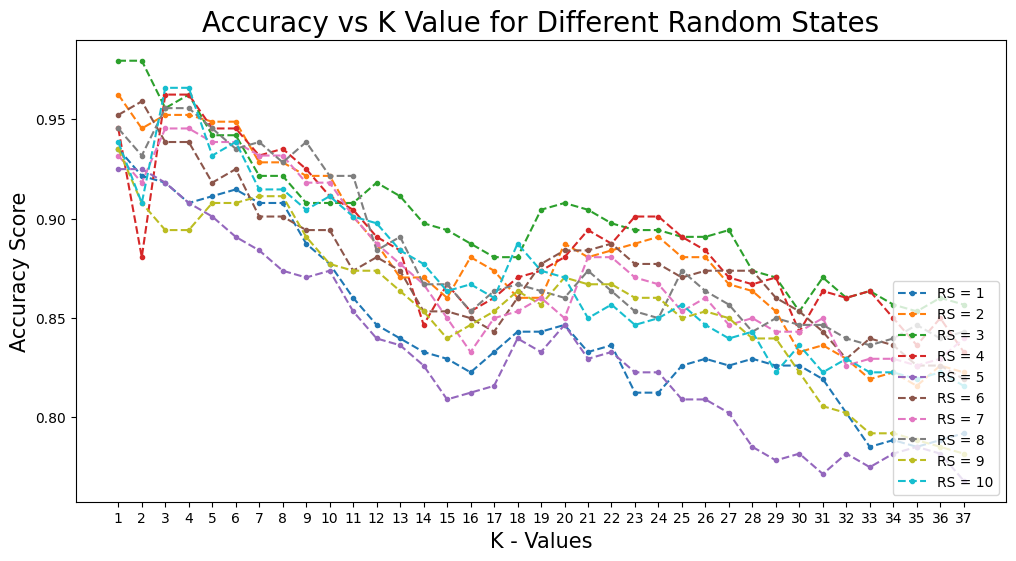

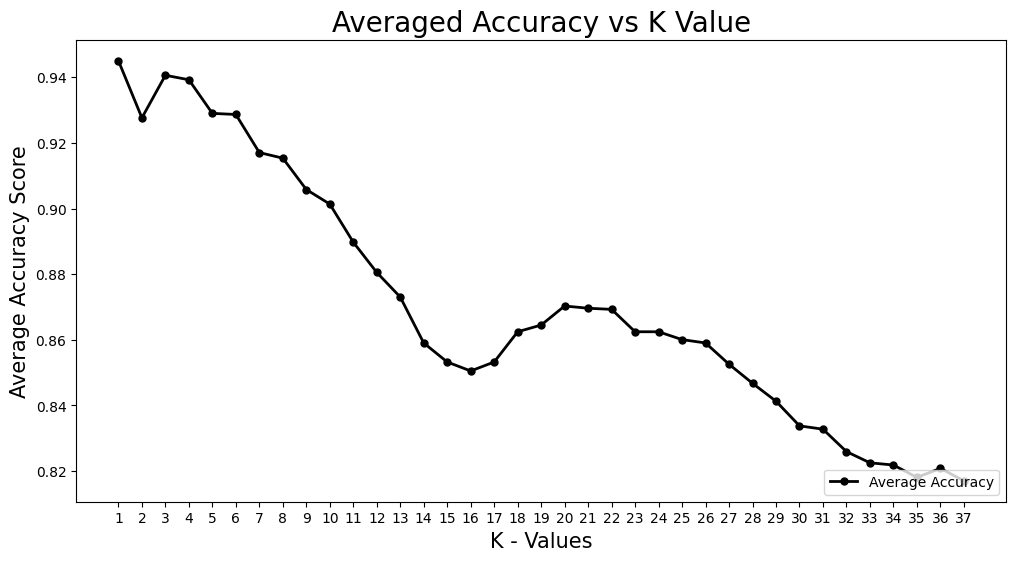

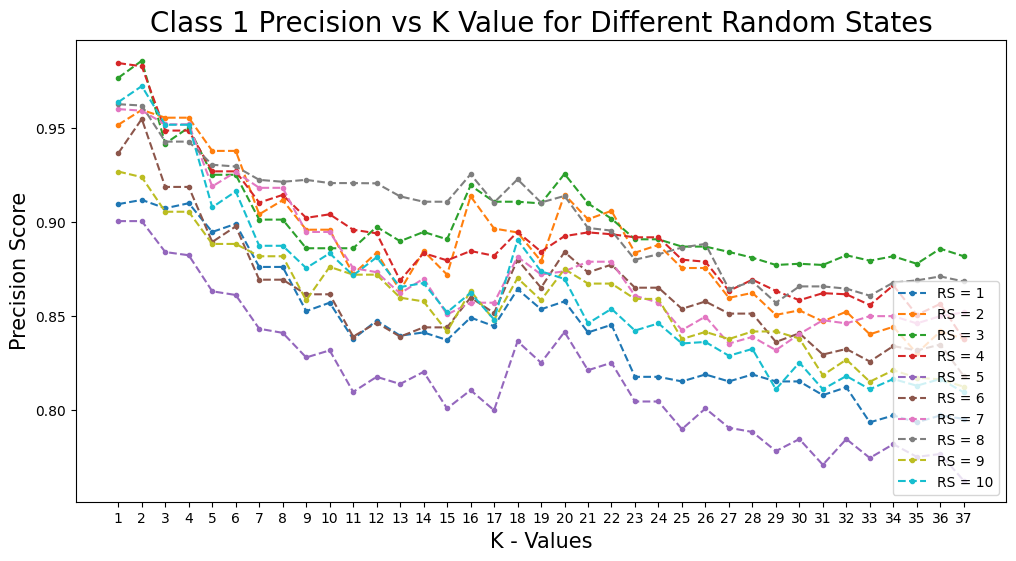

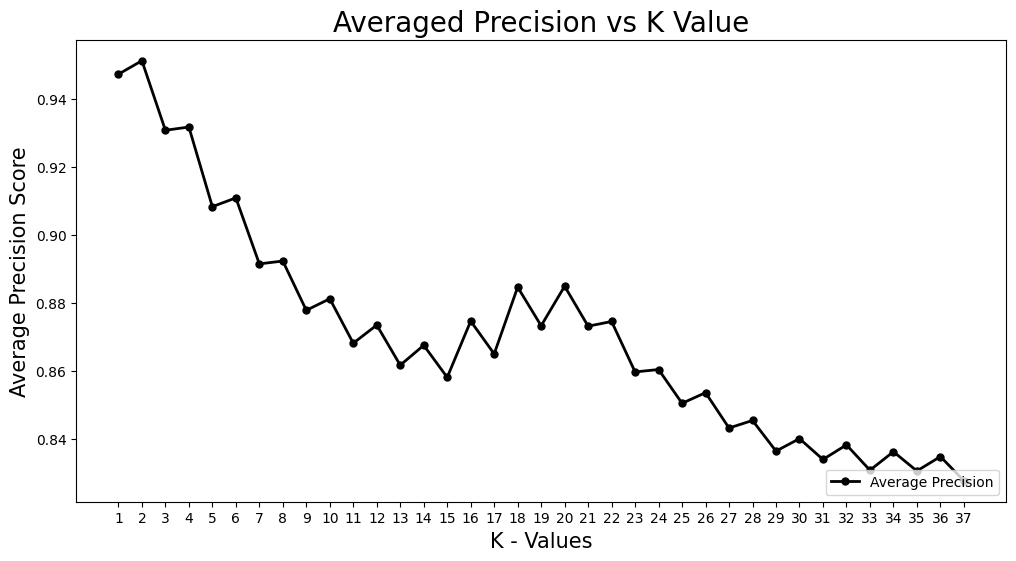

Train Accuracy: 88.65%
Test Accuracy: 84.98%
Class 1 Precision: 85.45%
[[ 67  31]
 [ 13 182]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        98
           1       0.85      0.93      0.89       195

    accuracy                           0.85       293
   macro avg       0.85      0.81      0.82       293
weighted avg       0.85      0.85      0.85       293



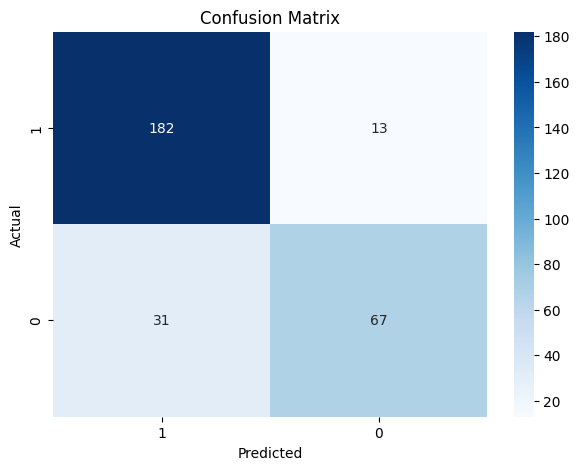

In [19]:
#STEP 1: See above

#STEP 2: See above


#STEP 3: Convert Severity to Presence
df_cancerpresent = df.copy()
df_cancerpresent.rename(columns={'Severity': 'Cancer Present'}, inplace=True)
df_cancerpresent.loc[df_cancerpresent['Cancer Present'].isin([0,1,2]), 'Cancer Present'] = 1 # 1 = Positive
df_cancerpresent.loc[df_cancerpresent['Cancer Present'] == 3, 'Cancer Present'] = 0 # 0 = Negative


#STEP 4: Split data into features and label
X = df_cancerpresent[['Genetic Risk','Alcohol Usage', 'Obesity', 'Smoking']]
y = df_cancerpresent['Cancer Present']


#STEP 5: Find Optimal K

# Calculate the maximum k value as the square root of rows_nbr
max_k = int(np.sqrt(df_cancerpresent.shape[0]))
print ("The length of the dataframe is: " + str(df_cancerpresent.shape[0]))
print ("The max K value is: " + str(max_k))

# Create an empty list of zeros for acc and prec(we will replace it later)
sum_accuracies = np.zeros(max_k-1)
sum_precision = np.zeros(max_k-1)

# Find Optimal K for ACCURACY
plt.figure(figsize=(12,6))
for RS in range (1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RS)
    scaler = StandardScaler() # Assign an instance of the StandardScaler class and assign it to the var "scaler"
    X_train = scaler.fit_transform(X_train) # Two things happen: fit = Scaler learns the mean and SD from the training data; transform = Scaler uses the learned parameters to scale the training data
    X_test = scaler.transform(X_test) # The Scaler uses the learned parameters to scale the training data

    accuracy_list=[] # Empty list that will store the accuracy score value of k
    for i in range (1,max_k):  # Took the range of k from 1 to maxk
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred =knn.predict(X_test)
        curr_accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(curr_accuracy)

        sum_accuracies[i-1] += curr_accuracy

    # Plot accuracy curve for the current random state
    plt.plot(range(1, max_k), accuracy_list, marker="o", linestyle="dashed", markersize=3, label=f"RS = {RS}")

# Build plot for Accuracy vs K across 10 RS
plt.title("Accuracy vs K Value for Different Random States", fontsize=20)
plt.xlabel("K - Values", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.xticks(range(1, max_k))
plt.legend(loc="lower right")  # Display legend to indicate random states
plt.show()

# Average findings
avg_accuracy = sum_accuracies / 10
plt.figure(figsize = (12,6))
plt.plot(range(1, max_k), avg_accuracy, marker="o", linestyle="-", color="black",markersize = 5, linewidth=2, label="Average Accuracy")

# Build Averaged plot
plt.title("Averaged Accuracy vs K Value", fontsize=20)
plt.xlabel("K - Values", fontsize=15)
plt.ylabel("Average Accuracy Score", fontsize=15)
plt.xticks(range(1, max_k))
plt.legend(loc="lower right", fontsize=10)  # Reduced fontsize for legend
plt.show()


# Find Optimal K for PRECISION
plt.figure(figsize=(12,6))
for RS in range (1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RS)
    scaler = StandardScaler() # Assign an instance of the StandardScaler class and assign it to the var "scaler"
    X_train = scaler.fit_transform(X_train) # Two things happen: fit = Scaler learns the mean and SD from the training data; transform = Scaler uses the learned parameters to scale the training data
    X_test = scaler.transform(X_test) # The Scaler uses the learned parameters to scale the training data

    # Create a list to store precision values for Class 1
    class_1_preclist = []

    # Loop through possible k values and compute precision for each
    for j in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        curr_precision = precision_score(y_test, y_pred, pos_label=1)  # The label being = 1 means Class 1 precision
        class_1_preclist.append(curr_precision)

        sum_precision[j-1] += curr_precision

    # Plot prec curve for the current random state
    plt.plot(range(1, max_k), class_1_preclist, marker="o", linestyle="dashed", markersize=3, label=f"RS = {RS}")

# Build plot for C1 Prec and K across 10 RS
plt.title("Class 1 Precision vs K Value for Different Random States", fontsize=20)
plt.xlabel("K - Values", fontsize=15)
plt.ylabel("Precision Score", fontsize=15)
plt.xticks(range(1, max_k))
plt.legend(loc="lower right")  # Display legend to indicate random states
plt.show()

# Average Findings
avg_prec = sum_precision / 10
plt.figure(figsize = (12,6))
plt.plot(range(1, max_k), avg_prec, marker="o", linestyle="-", color="black",markersize = 5, linewidth=2, label="Average Precision")

# Build Averaged Plot
plt.title("Averaged Precision vs K Value", fontsize=20)
plt.xlabel("K - Values", fontsize=15)
plt.ylabel("Average Precision Score", fontsize=15)
plt.xticks(range(1, max_k))
plt.legend(loc="lower right", fontsize=10)  # Reduced fontsize for legend
plt.show()


#STEP 6: Apply KNN

# Final split into train and test RS 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# The best K value from a combination of class 1 Prec and Accuracy seems to be at K=20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Train accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# C1 Precision
class1_prec = precision_score(y_test, y_pred, pos_label=1)
print(f"Class 1 Precision: {class1_prec * 100:.2f}%")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Create confusion matrix
# Get unique classes
classes = df_cancerpresent['Cancer Present'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Blues', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
"""

Step 3: Research Question 2

Building a model to identify lung cancer cases with the highest severity to support clinical findings on patients undergoing lung cancer screening/diagnosis.

Associated Steps:

1. Import libraries (see above)
2. Read in dataset (see above)
3. Create a new column for Severity without healthy patients
4. Split (RQ2 variables only) data into features and label
5. Find optimal K to maximize Overall Accuracy
    a. Choose optimal K based on a local maximum of accuracy/local minimum of error to avoid overfitting/underfitting
6. Apply KNN to create a classification report and confusion matrix

"""

'\n\nStep 3: Research Question 2\n\nBuilding a model to identify lung cancer cases with the highest severity to support clinical findings on patients undergoing lung cancer screening/diagnosis.\n\nAssociated Steps:\n\n1. Import libraries (see above)\n2. Read in dataset (see above)\n3. Create a new column for Severity without healthy patients\n4. Split (RQ2 variables only) data into features and label \n5. Find optimal K to maximize Overall Accuracy\n    a. Choose optimal K based on a local maximum of accuracy/local minimum of error to avoid overfitting/underfitting\n6. Apply KNN to create a classification report and confusion matrix\n\n'

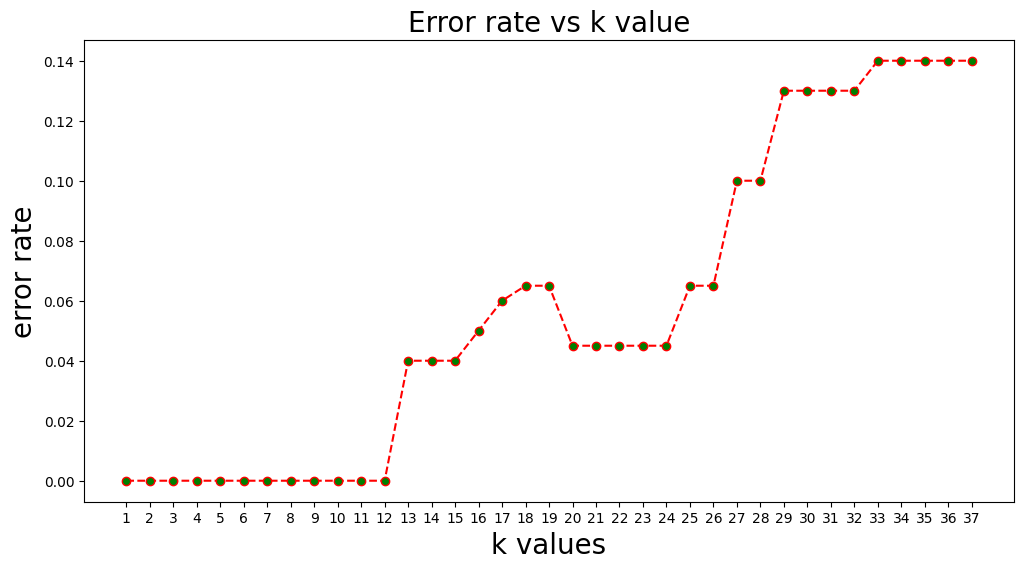

Train Accuracy: 96.12%
Test Accuracy: 95.50%
[[49  4  2]
 [ 0 63  0]
 [ 0  3 79]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.90      1.00      0.95        63
           2       0.98      0.96      0.97        82

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



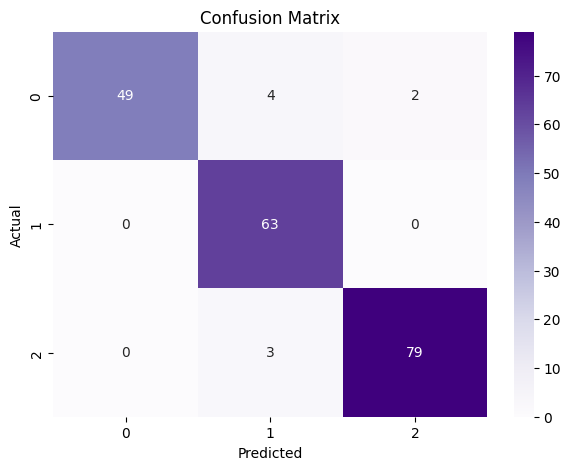

In [21]:
#STEP 1+2 are completed above


#STEP 3: Convert Severity to not include Severity = 3
canceronly = df[df['Severity'] != 3]


#STEP 4: Split RQ2 data into features and label
X = canceronly[[ 'Alcohol Usage', 'Genetic Risk', 'Air Pollution',
                'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker',
                'Chest Pain', 'Coughing of Blood']]
y = canceronly['Severity']


#STEP 5:

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

error_rate =[] # list that will store the accuracy score value of k
for i in range (1, max_k):  #Took the range of k from 1 to max_k
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plotting the accuracy vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1, max_k),error_rate,marker="o",
         markerfacecolor="green",
         linestyle="dashed",color="red")
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1, max_k))
plt.show()

# Apply KNN, the Optimal K was 20 based on the plot
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Train accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Create Confusion Matrix
# Get unique classes
classes = canceronly['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes),
            cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
"""
Clustering Analysis

We did this analysis to investigate how the data distributes itself with no labelled and to apply the code we learned in class!

"""

'\nClustering Analysis\n\nWe did this analysis to investigate how the data distributes itself with no labelled and to apply the code we learned in class!\n\n'

In [23]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# k mode
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking',	'Passive Smoker', 'Chest Pain', 'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df['Cancer Status'] = df['Severity'] != 3

features = ['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking',	'Passive Smoker', 'Chest Pain', 'Coughing of Blood']
# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# k-mode
# kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
kmode = KModes(n_clusters = 2, init = "random", verbose=1)
clusters = kmode.fit_predict(data)
# clusters
# plot_clusters(data, clusters, 3)

# proportion of cancer patient that got clustered in cluster 1
p1 = sum(df['Cancer Status'][clusters[:]==0] == True)/sum(df['Cancer Status'] == True)

# proportion of healthy patient that got clustered in cluster 1
p2 = sum(df['Cancer Status'][clusters[:]==0] == False)/sum(df['Cancer Status'] == False)


# proportion of cancer patient that got clustered in cluster 2
p3 = sum(df['Cancer Status'][clusters[:]==1] == True)/sum(df['Cancer Status'] == True)

# proportion of healthy patient that got clustered in cluster 2
p4 = sum(df['Cancer Status'][clusters[:]==1] == False)/sum(df['Cancer Status'] == False)

print(f"{p1*100}% cancer patients and {p2*100}% healthy patients are in cluster 1. \
{p3*100}% cancer patients and {p4*100}% healthy patients are in cluster 2 .")

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 475, cost: 10024.0
Run 1, iteration: 2/100, moves: 146, cost: 9828.0
Run 1, iteration: 3/100, moves: 143, cost: 9727.0
Run 1, iteration: 4/100, moves: 19, cost: 9727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 381, cost: 9731.0
Run 2, iteration: 2/100, moves: 77, cost: 9721.0
Run 2, iteration: 3/100, moves: 12, cost: 9721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 313, cost: 10085.0
Run 3, iteration: 2/100, moves: 100, cost: 10044.0
Run 3, iteration: 3/100, moves: 2, cost: 10044.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 487, cost: 9820.0
Run 4, iteration: 2/100, moves: 101, cost: 9752.0
Run 4, iteration: 3/100, moves: 0, cost: 9752.0
Init: initializing centroids
Init

In [24]:
# Creating a proportional healthy and cancer patient dataset
df_cancer = df.loc[df['Cancer Status'] == True]
df_cancer = df_cancer.sample(frac = 0.465, random_state=42)
df_healthy = df.loc[df['Cancer Status'] == False]
balanced_df = pd.concat([df_cancer, df_healthy])


In [25]:
balanced_data =  balanced_df[features].to_numpy()

kmode = KModes(n_clusters = 2, init = "random", verbose=1)
cluster = kmode.fit_predict(balanced_data)
cluster
# balanced_df['Cancer Status'][cluster[:]==0] == True
cluster_1 = balanced_df[cluster[:]==0]
cluster_2 = balanced_df[cluster[:]==1]
p1 = sum(cluster_1['Cancer Status']== True)/sum(balanced_df['Cancer Status'] == True)
p2 = sum(cluster_1['Cancer Status']== False)/sum(balanced_df['Cancer Status'] == False)
p3 = sum(cluster_2['Cancer Status']== True)/sum(balanced_df['Cancer Status'] == True)
p4 = sum(cluster_2['Cancer Status']== False)/sum(balanced_df['Cancer Status'] == False)

print(f"{p1*100}% cancer patients and {p2*100}% healthy patients are in cluster 1. \
{p3*100}% cancer patients and {p4*100}% healthy patients are in cluster 2 .")


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 184, cost: 6361.0
Run 1, iteration: 2/100, moves: 55, cost: 6300.0
Run 1, iteration: 3/100, moves: 24, cost: 6300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 107, cost: 6651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 189, cost: 6562.0
Run 3, iteration: 2/100, moves: 128, cost: 6549.0
Run 3, iteration: 3/100, moves: 80, cost: 6471.0
Run 3, iteration: 4/100, moves: 156, cost: 6324.0
Run 3, iteration: 5/100, moves: 56, cost: 6300.0
Run 3, iteration: 6/100, moves: 26, cost: 6300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 128, cost: 6299.0
Run 4, iteration: 2/100, moves: 54, cost: 6299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5,

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  0  0  3]
 [ 0 56  0  2]
 [ 0  0 80  0]
 [ 7  1  0 90]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        57
           1       0.98      0.97      0.97        58
           2       1.00      1.00      1.00        80
           3       0.95      0.92      0.93        98

    accuracy                           0.96       293
   macro avg       0.95      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



In [28]:
"""

Appendix:

RQ1:
Variables Included: Easily obtainable data, mostly distinct datapoints
Alcohol Usage
Obesity
Smoking
Genetic Risk
Already flags patient for being at risk, however patients won’t be tested simply because they have family history

Variables Excluded: Irrelevance, redundancy, difficult to obtain
Gender: Not relevant
Air Pollution: Not typically known by patients
Age: Performed poorly in the initial correlation heatmap
Lung Disease: Already flags patients for being at risk and testing
Passive Smoker: Not always known or recorded
Chest Pain: Already flags patient for being at risk, can also be attributed to many other things, might not be disclosed, etc.
Coughing of Blood: Already flags patients for testing

RQ2:
Variables Indluded: High Correlation in heatmap and distinctness of data
Exclusion: Irrelevance and poor correlation
"""

'\n\nAppendix:\n\nRQ1:\nVariables Included: Easily obtainable data, mostly distinct datapoints\nAlcohol Usage\nObesity\nSmoking\nGenetic Risk\nAlready flags patient for being at risk, however patients won’t be tested simply because they have family history\n\nVariables Excluded: Irrelevance, redundancy, difficult to obtain\nGender: Not relevant\nAir Pollution: Not typically known by patients\nAge: Performed poorly in the initial correlation heatmap\nLung Disease: Already flags patients for being at risk and testing\nPassive Smoker: Not always known or recorded\nChest Pain: Already flags patient for being at risk, can also be attributed to many other things, might not be disclosed, etc.\nCoughing of Blood: Already flags patients for testing\n\nRQ2:\nVariables Indluded: High Correlation in heatmap and distinctness of data\nExclusion: Irrelevance and poor correlation\n'